# BIONIC Methods Tests and Data Visualization

## Exploration and Gene Filtering

In [1]:
# imports
from itertools import combinations
import numpy as np
import pandas as pd
import pearsonr as pearsonr
from scipy.stats import pearsonr

In [4]:
#File Read
df = pd.read_csv("../outputs/output.csv", sep=',', index_col=0)
df

,H_CHIP_263_A,H_CHIP_263_B,H_CHIP_264_A,H_CHIP_264_B,H_CHIP_265_A,H_CHIP_265_B,H_CHIP_266_A,H_CHIP_266_B,H_CHIP_267_A,H_CHIP_267_B,H_CHIP_268_A,H_CHIP_268_B,H_CHIP_269_A,H_CHIP_269_B
array_element_name,,,,,,,,,,,,,,
AT2G42240,110.0,95.2,91.1,133.4,97.2,121.3,85.2,125.7,92.9,127.4,92.7,102.4,102.5,112.5
AT2G42250,28.5,27.2,34.2,29.3,28.4,30.5,18.5,24.6,26.7,12.0,42.5,35.3,21.9,31.7
AT2G42270,87.8,89.8,72.2,83.4,86.0,85.2,108.0,66.4,91.0,94.6,98.6,76.5,81.6,86.3
AT2G42280,42.5,35.0,21.2,30.5,17.1,14.4,19.8,1.2,41.7,31.1,21.2,17.3,18.2,12.3
AT2G42120,262.4,282.2,248.7,266.0,209.7,235.3,204.1,289.5,228.7,213.9,248.7,275.3,233.3,246.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257585_at,4.0,6.4,5.8,9.2,1.8,1.9,17.7,2.8,8.3,2.0,4.0,10.6,5.5,1.8
AT1G50760,3.9,8.8,13.0,6.1,13.8,31.0,12.8,0.5,9.4,22.8,14.7,5.5,27.7,1.5
AT1G56310,153.5,148.0,78.4,112.0,97.2,114.7,109.8,112.8,93.4,105.7,101.7,91.2,89.2,81.6


In [16]:
# Gathering genes
genes = list(df.T.columns)
# genes

In [6]:
# Check gene values
# df.loc["AT2G42120"].values

In [7]:
# Shape
df.shape

(22553, 14)

In [8]:
# Define non-organ genes and keep only them
not_organ_genes = [x for x in genes if not x.startswith('ATC') and not x.startswith('ATM')]
df = df.loc[not_organ_genes]

In [9]:
# New shape
df.shape

(22393, 14)

In [11]:
# Check the value ranges of the expression values for each conditions
grouped_data = df.groupby(df.columns, axis=1)
grouped_data.describe()

,,count,mean,std,min,25%,50%,75%,max
H_CHIP_263_A,H_CHIP_263_A,22393.0,272.459737,690.040142,0.0,17.8,78.1,249.2,11717.7
H_CHIP_263_B,H_CHIP_263_B,22393.0,262.502188,622.059483,0.0,15.7,80.9,253.8,9982.1
H_CHIP_264_A,H_CHIP_264_A,22393.0,270.859818,674.466948,0.0,20.1,82.8,251.3,11184.2
H_CHIP_264_B,H_CHIP_264_B,22393.0,264.545961,638.908159,0.0,16.1,82.6,250.9,9832.8
H_CHIP_265_A,H_CHIP_265_A,22393.0,267.597651,650.444484,0.0,15.9,81.0,254.7,10244.4
H_CHIP_265_B,H_CHIP_265_B,22393.0,267.168897,659.578860,0.0,19.7,84.0,249.1,10996.7
H_CHIP_266_A,H_CHIP_266_A,22393.0,268.420618,656.074625,0.0,17.5,81.1,252.9,10368.2
H_CHIP_266_B,H_CHIP_266_B,22393.0,266.398857,653.703400,0.0,18.3,82.8,251.1,11009.9
H_CHIP_267_A,H_CHIP_267_A,22393.0,267.108270,650.808165,0.0,20.2,87.5,254.2,11547.8
H_CHIP_267_B,H_CHIP_267_B,22393.0,265.558268,649.749648,0.1,16.6,85.8,254.1,10688.8


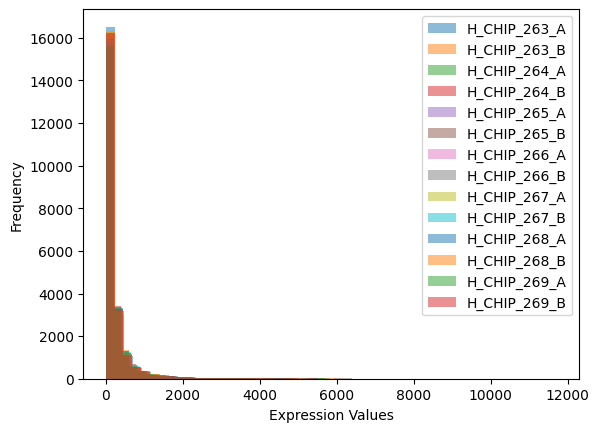

In [21]:
# Plot distribution of expression values for each condition
from matplotlib import pyplot as plt

for sample, group in grouped_data:
    plt.hist(group[sample], bins=50, alpha=0.5, label=sample)

plt.xlabel("Expression Values")
plt.ylabel("Frequency")
plt.legend()

plt.show()

In [12]:
# Scale values by individual samples
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df.T)
scaled_df = pd.DataFrame(scaled_df, columns=df.index, index=df.columns)

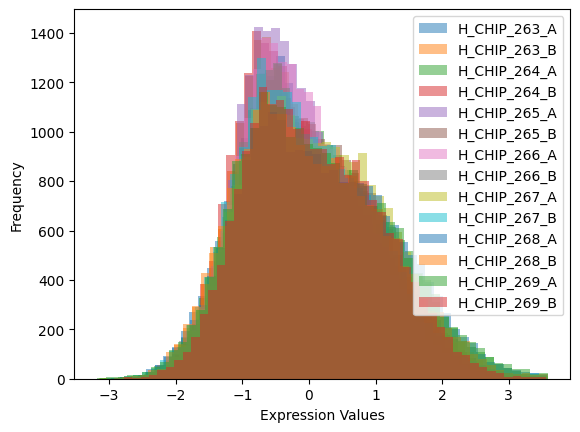

In [23]:
# Plot distribution of expression values for each condition after scaling
grouped_scl_data = scaled_df.T.groupby(scaled_df.T.columns, axis=1)

for sample, group in grouped_scl_data:
    plt.hist(group[sample], bins=50, alpha=0.5, label=sample)

plt.xlabel("Expression Values")
plt.ylabel("Frequency")
plt.legend()

plt.show()

In [13]:
# Remove genes through the coefficient of variation
var = scaled_df.T.values.var(axis=1)
mean_expression = np.mean(scaled_df.T.values, axis=1)
ratio = var / mean_expression

variance_threshold = 0.5
filtered_df_1 = scaled_df.loc[:, ratio > variance_threshold]
filtered_df_1.shape

C:\Users\anaca\AppData\Local\Temp\ipykernel_22392\3048272704.py:4: RuntimeWarning: divide by zero encountered in divide
  ratio = var / mean_expression


(14, 11359)

In [14]:
# Remove genes through the mean absolute deviation
mad = np.mean(np.abs(scaled_df.values - mean_expression[np.newaxis, :]), axis=0)
scaled_mad = mad / mean_expression

variance_threshold = 0.5
filtered_df_2 = scaled_df.loc[:, scaled_mad > variance_threshold]
filtered_df_2.shape

C:\Users\anaca\AppData\Local\Temp\ipykernel_22392\2232215009.py:3: RuntimeWarning: divide by zero encountered in divide
  scaled_mad = mad / mean_expression


(14, 11359)

In [15]:
# Check if the two methods give the same genes
np.array_equal(filtered_df_1.columns, filtered_df_2.columns)

True

In [31]:
# Create a new dataframe with the filtered genes
filtered_df_2.T.to_csv("reduced_output_corrected.csv")
corrected = filtered_df_2.T

In [36]:
# Split the index strings by semicolon and keep only the first part [kept only the first gene name]
corrected.index = corrected.index.str.split(';').str[0]
corrected.to_csv("reduced_output_corrected.csv")

In [17]:
# corrected.columns

In [62]:
expression_data_df = pd.read_csv("reduced_output_corrected.csv", sep=',', index_col=0, header=0)
expression_data_df.to_csv("reduced_output_corrected.csv")

In [63]:
# Delete repetitive genes
expression_data_df = expression_data_df.loc[~expression_data_df.index.duplicated(keep='first')]
expression_data_df.to_csv("reduced_output_corrected.csv")

## Old thresholding Approach

In [13]:
# Check variance of each gene across all samples
df.T.values.var(axis=0)

array([222.10209184,  51.52392857, 103.59102041, ..., 450.27632653,
        51.20637755,  77.43637755])

In [31]:
# Check the number of genes with variance above the threshold
variance_threshold = 10000
variance = df.T.values.var(axis=0)
count_var = len(variance[variance > variance_threshold])
count_var

1994

In [39]:
# Keep only the genes with variance above the threshold
reduced_df = df.T.loc[:, variance > variance_threshold]

In [43]:
reduced_df.T

,H_CHIP_263_A,H_CHIP_263_B,H_CHIP_264_A,H_CHIP_264_B,H_CHIP_265_A,H_CHIP_265_B,H_CHIP_266_A,H_CHIP_266_B,H_CHIP_267_A,H_CHIP_267_B,H_CHIP_268_A,H_CHIP_268_B,H_CHIP_269_A,H_CHIP_269_B
array_element_name,,,,,,,,,,,,,,
AT2G42210,2761.9,2341.3,2618.3,2130.1,2568.0,2538.6,2688.9,2334.4,2913.2,2294.4,2580.2,2314.7,2559.5,2477.0
AT2G42200,483.2,449.1,411.2,369.7,580.2,492.2,541.9,638.2,590.9,604.4,581.7,741.4,853.9,770.4
AT2G33040,2309.2,2130.5,2265.3,2421.0,2319.2,2820.0,2325.9,2745.9,2106.4,2437.6,2116.1,2451.6,1974.5,2292.9
AT2G26740;AT2G26750,131.4,126.3,382.4,495.2,1001.1,892.4,901.5,1283.5,348.3,603.8,414.9,463.6,498.9,562.1
AT2G26690,281.2,231.5,451.6,424.5,591.2,425.1,356.1,329.9,355.5,287.5,535.4,239.5,291.1,246.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT2G40750,604.8,427.3,708.8,696.2,448.9,363.9,530.4,359.1,182.1,144.0,79.0,95.8,72.0,112.5
AT2G24590,1338.3,1006.2,1215.9,1011.8,1134.1,792.3,1115.2,811.2,652.0,579.3,661.2,551.7,708.9,578.0
AT1G55360,558.2,676.6,657.2,720.3,766.6,724.7,754.4,880.6,973.9,1144.3,1043.2,1138.7,1061.8,1119.5


In [45]:
reduced_df.T.to_csv("reduced_output.csv")

In [53]:
red = reduced_df.T
red

,H_CHIP_263_A,H_CHIP_263_B,H_CHIP_264_A,H_CHIP_264_B,H_CHIP_265_A,H_CHIP_265_B,H_CHIP_266_A,H_CHIP_266_B,H_CHIP_267_A,H_CHIP_267_B,H_CHIP_268_A,H_CHIP_268_B,H_CHIP_269_A,H_CHIP_269_B
array_element_name,,,,,,,,,,,,,,
AT2G42210,2761.9,2341.3,2618.3,2130.1,2568.0,2538.6,2688.9,2334.4,2913.2,2294.4,2580.2,2314.7,2559.5,2477.0
AT2G42200,483.2,449.1,411.2,369.7,580.2,492.2,541.9,638.2,590.9,604.4,581.7,741.4,853.9,770.4
AT2G33040,2309.2,2130.5,2265.3,2421.0,2319.2,2820.0,2325.9,2745.9,2106.4,2437.6,2116.1,2451.6,1974.5,2292.9
AT2G26740;AT2G26750,131.4,126.3,382.4,495.2,1001.1,892.4,901.5,1283.5,348.3,603.8,414.9,463.6,498.9,562.1
AT2G26690,281.2,231.5,451.6,424.5,591.2,425.1,356.1,329.9,355.5,287.5,535.4,239.5,291.1,246.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT2G40750,604.8,427.3,708.8,696.2,448.9,363.9,530.4,359.1,182.1,144.0,79.0,95.8,72.0,112.5
AT2G24590,1338.3,1006.2,1215.9,1011.8,1134.1,792.3,1115.2,811.2,652.0,579.3,661.2,551.7,708.9,578.0
AT1G55360,558.2,676.6,657.2,720.3,766.6,724.7,754.4,880.6,973.9,1144.3,1043.2,1138.7,1061.8,1119.5


In [54]:
# split the index strings by semicolon and keep only the first part
red.index = red.index.str.split(';').str[0]

# print the modified DataFrame
red

,H_CHIP_263_A,H_CHIP_263_B,H_CHIP_264_A,H_CHIP_264_B,H_CHIP_265_A,H_CHIP_265_B,H_CHIP_266_A,H_CHIP_266_B,H_CHIP_267_A,H_CHIP_267_B,H_CHIP_268_A,H_CHIP_268_B,H_CHIP_269_A,H_CHIP_269_B
array_element_name,,,,,,,,,,,,,,
AT2G42210,2761.9,2341.3,2618.3,2130.1,2568.0,2538.6,2688.9,2334.4,2913.2,2294.4,2580.2,2314.7,2559.5,2477.0
AT2G42200,483.2,449.1,411.2,369.7,580.2,492.2,541.9,638.2,590.9,604.4,581.7,741.4,853.9,770.4
AT2G33040,2309.2,2130.5,2265.3,2421.0,2319.2,2820.0,2325.9,2745.9,2106.4,2437.6,2116.1,2451.6,1974.5,2292.9
AT2G26740,131.4,126.3,382.4,495.2,1001.1,892.4,901.5,1283.5,348.3,603.8,414.9,463.6,498.9,562.1
AT2G26690,281.2,231.5,451.6,424.5,591.2,425.1,356.1,329.9,355.5,287.5,535.4,239.5,291.1,246.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT2G40750,604.8,427.3,708.8,696.2,448.9,363.9,530.4,359.1,182.1,144.0,79.0,95.8,72.0,112.5
AT2G24590,1338.3,1006.2,1215.9,1011.8,1134.1,792.3,1115.2,811.2,652.0,579.3,661.2,551.7,708.9,578.0
AT1G55360,558.2,676.6,657.2,720.3,766.6,724.7,754.4,880.6,973.9,1144.3,1043.2,1138.7,1061.8,1119.5


In [56]:
red.to_csv("reduced_output.csv")